# Food Reviews Sentimenal Analysis

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.version)
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#clean the restaurant names and reviews before indexing
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from sklearn.cross_validation import train_test_split
from wordcloud import WordCloud, STOPWORDS 

nltk.download('stopwords')

nltk.download('wordnet')

stop_words = stopwords.words('english')


#create the json and post


import os


3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


/home/sloth/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[nltk_data] Downloading package stopwords to /home/sloth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sloth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#load data
def get_data():
    df = pd.read_csv("data/all_reviews.csv", sep="\t")
    return df

In [4]:
#remove rows with empty 'review_body'
df = get_data()
df=df[df["review_body"].isnull()==False]

In [5]:
# data descriptions
print("columns: {}".format(df.columns))
print("shape {}".format(df.shape))
print(df.head())
print(df.info())
print(df.describe())
print("scores in data: {}".format(df["score"].unique()))
print("the types of scores in data: {}".format([type(a) for a in df["score"].unique()]) )

print("number of empty scores: {}".format(df["score"].isnull().sum()))

columns: Index(['Unnamed: 0', 'id', 'score', 'review_body'], dtype='object')
shape (312533, 4)
   Unnamed: 0     id  score                                        review_body
0           0  10033    4.0  The sashimi is fresh, however, for those who d...
1           1  10034    5.0  friendly staffs lead by a very personalised fl...
2           2  10035    3.0  Tried the $80 omakase because the waitress sai...
3           3  10036    4.0  Went over on a weeknight for a sudden omakase ...
4           4  10037    5.0  We came on a friend's recommendation and had a...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312533 entries, 0 to 312553
Data columns (total 4 columns):
Unnamed: 0     312533 non-null int64
id             312533 non-null int64
score          239453 non-null float64
review_body    312533 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 11.9+ MB
None
          Unnamed: 0             id          score
count  312533.000000  312533.000000  239453.000000


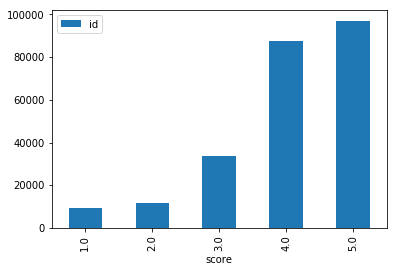

In [7]:
#distribution of scores

df[["id","score"]].groupby(['score']).count().plot(kind='bar')


In [8]:
# take 5 star as labelled 'positive' and 1 star are labelled 'negative'
pd.set_option('display.max_colwidth', -1)
five_star_df = df.loc[df['score'] == 5]
one_star_df = df.loc[df['score'] == 1]
print("5 star reviews peek")
print("shape: {}".format(five_star_df.shape))
print(five_star_df.head())
print("1 star reviews peek")
print("shape: {}".format(one_star_df.shape))
print(one_star_df.head())
print("Merging 1 star and 5 star reviews into df")
df=pd.concat([five_star_df, one_star_df], axis=0)
print("Shape: {}".format(df.shape))


5 star reviews peek
shape: (97006, 4)
    Unnamed: 0     id  score  \
1   1           10034  5.0     
4   4           10037  5.0     
8   8           10041  5.0     
9   9           10042  5.0     
10  10          10043  5.0     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review_body  
1   friendly staffs lead by a very personalised floor managerevery fo

5 star word cloud


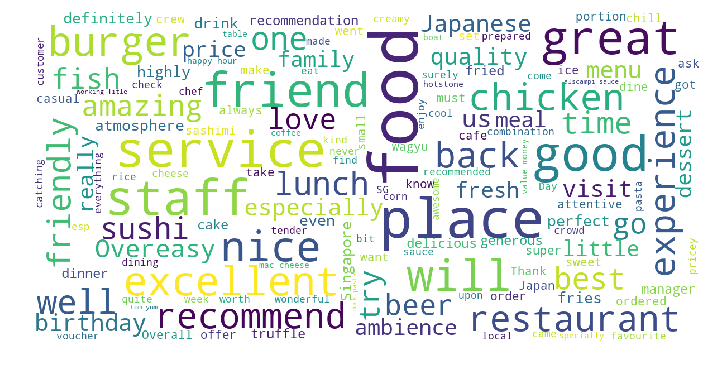

1 star word cloud


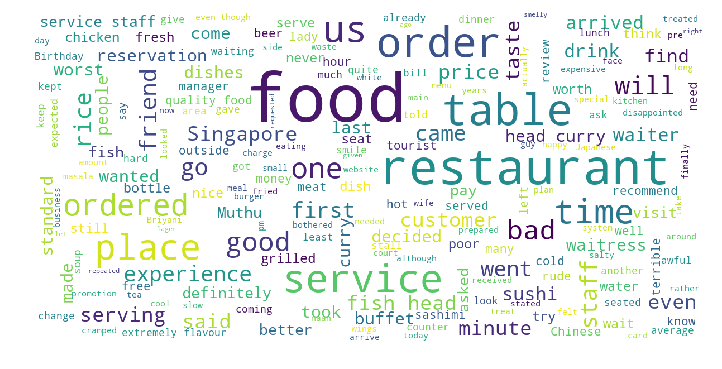

In [16]:
#wordcloud
wc_stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None, stopwords=wc_stopwords):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

print("5 star word cloud")
show_wordcloud(five_star_df['review_body'], stopwords=wc_stopwords)
print("1 star word cloud")
show_wordcloud(one_star_df['review_body'], stopwords=wc_stopwords)

In [17]:
# need to 

In [18]:
# Note: will not work if col val is NaN
def get_corpus_common_words(df_column):
    """ besides stopwords, words like food, orders, sg and restaurant are useless"""
    vec = CountVectorizer().fit(df["review_body"])
    bag_of_words = vec.transform(df_column)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:60]

In [19]:
common_words = get_corpus_common_words(df["review_body"])
print(common_words)

[('the', 443368), ('and', 299128), ('to', 179307), ('was', 137186), ('of', 130688), ('is', 118023), ('for', 107069), ('we', 102927), ('it', 93050), ('in', 91115), ('food', 84787), ('with', 81475), ('you', 59453), ('this', 57385), ('were', 50108), ('very', 49607), ('good', 49358), ('service', 48356), ('my', 48329), ('that', 48258), ('but', 46344), ('at', 45360), ('had', 44442), ('on', 44081), ('great', 42873), ('are', 42557), ('as', 42159), ('not', 41696), ('have', 39495), ('restaurant', 36437), ('they', 35128), ('place', 34245), ('so', 33662), ('our', 32263), ('there', 30606), ('be', 30002), ('all', 29442), ('singapore', 29427), ('staff', 27692), ('from', 25697), ('one', 24933), ('will', 23236), ('us', 22794), ('by', 22003), ('here', 21533), ('if', 21097), ('which', 20925), ('their', 20760), ('time', 20726), ('really', 19612), ('just', 19130), ('back', 18973), ('well', 18954), ('excellent', 18821), ('best', 18787), ('can', 18688), ('also', 18011), ('an', 17649), ('nice', 17376), ('woul

Show wordclloud of all reviews


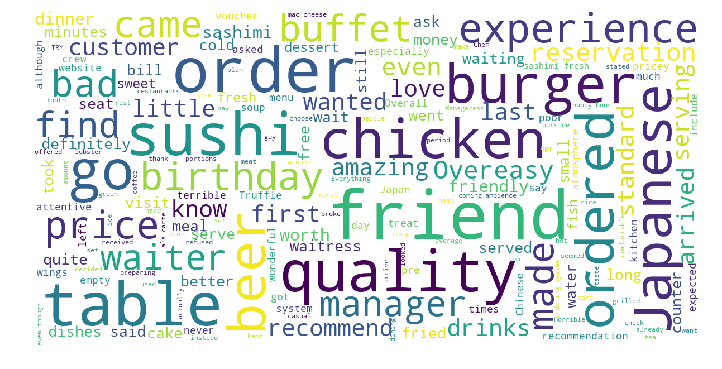

In [22]:
#remove common words

combined_stopwords=wc_stopwords.union(set([e[0] for e in common_words ]))
#print(combined_stopwords)
print("Show wordclloud of all reviews")
show_wordcloud(df["review_body"], stopwords=combined_stopwords)

5 star word cloud  after removing common words and stopwords


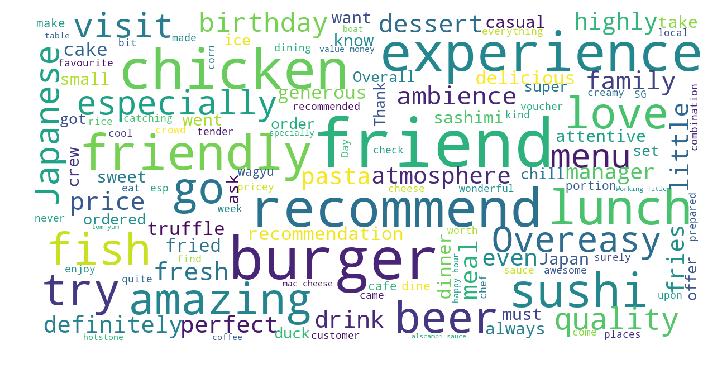

1 star word cloud after removing common words and stopwords


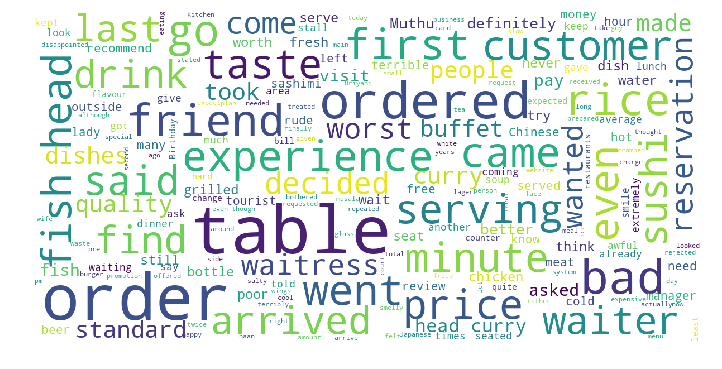

In [23]:
print("5 star word cloud  after removing common words and stopwords")
show_wordcloud(five_star_df['review_body'], stopwords=combined_stopwords)
print("1 star word cloud after removing common words and stopwords")
show_wordcloud(one_star_df['review_body'], stopwords=combined_stopwords)

In [25]:
# creating feature "text_length" per review
df['text_length'] = df['review_body'].apply(len)
df.head()

,Unnamed: 0,id,score,review_body,text_length
1,1,10034,5.0,"friendly staffs lead by a very personalised floor managerevery food are fresh , love the sushi as well. they will recommend seasonal fish and most of the time meet my expectationaffordable omakase starting from $50 everytime i step in is a whole new experienceA MUST TRY - air flown dessert - please ask the floor manager Anthony - hahahhahahahahha. It take a sweet tooth to know a sweet tooth. Most of the friends that i have recommend will text me a few weeks later. Shall we go back for the dessert......",507
4,4,10037,5.0,"We came on a friend's recommendation and had a lovely meal. Other reviews noted ""pricey,"" but it's not especially so. The sushi is tender, fresh, delicious, the menu extensive and service genuinely attentive. Lovely miso soup. The waiter carefully went over the bill, which is unusual. It was comfortable, quiet, polite. The staff seemed easy and attentive to each other. We would surely go again",396
8,8,10041,5.0,The japanese sets are reasonably priced with lots of combo to choose from. The sashimi are fresh and thick. The gindara and unagi are nicely grilled with teriyaki sauce. The meal is quite filling. Ambience is great and the staff are professional and approachable. will go back again,282
9,9,10042,5.0,Don't judge a book by its cover. This small Japanese restaurant tucked amidst other casual Japanese eateries is a little gem. Be pampered by the attentive waiting crew led by Anthony. Food is prepared by the its chef from Japan. His apprentices of 5 over years assisted him in preparing what might be fine Japanese dining at an affordable price. Ask for recommendation of sake to pair with the excellent sushi and sashimi. The draft Sapporo will do too. Try it! It's a little different from the other draft Sapporo. It's dispensed from a machine that is more common sight in Japan. Almost any type of visit is suitable. I went with family and for business and with friends. Ate there alone too,693
10,10,10043,5.0,"Needed a place for a quick lunch. Good food in decent sized portions, well-presented. The fish was very fresh. Excellent service.",129


Number of reviews for each range of text_lengths


,Unnamed: 0,text_length
Unnamed: 0,1.0,1.0
text_length,1.0,1.0


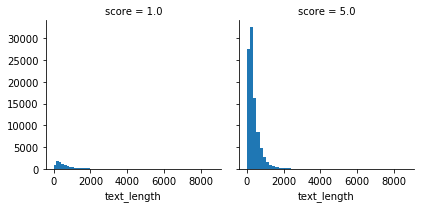

In [28]:
import warnings
warnings.filterwarnings('ignore')
g = sns.FacetGrid(data=df, col='score')
g.map(plt.hist, 'text_length', bins=50)
stars = df.ix[:, df.columns.difference(["id"])].groupby('score').mean()
print("Number of reviews for each range of text_lengths")
stars.corr()

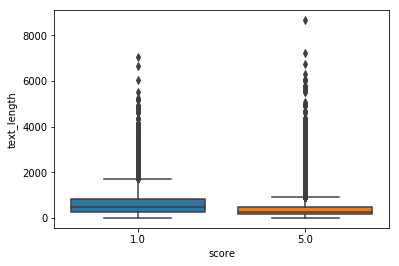

In [16]:
sns.boxplot(x='score', y='text_length', data=df)

In [29]:
#conclude text_length is not a really unique feature


# models

In [30]:
# clean text of review_body
def clean_description(description):

	try:
		#wordnet_lemmatizer = WordNetLemmatizer()
		stemmer = SnowballStemmer("english", ignore_stopwords=True)
		tokens = word_tokenize(description) #by whitespace
		words = [word for word in tokens if word.isalpha()] #remove punctuation
		#lower
		words = [word.lower() for word in words]
		#stopw words: https://www.ranks.nl/stopwords
		words = [w for w in words if not w in combined_stopwords]
		#porterstem
		#print(words)
		#stemmer2 = SnowballStemmer("english", ignore_stopwords=True)

		words = [stemmer.stem(w) for w in words]
		stitched = " ".join(words)

	except Exception as e:
		# empty after cleaning, err: expected string or bytes like object
		print("issue")
		print(e)
		return ""
	return stitched

df["review_body"]=df["review_body"].apply(clean_description)



In [19]:
print("After cleaning...")
print(df.head())


,Unnamed: 0,id,score,review_body,text_length
1,1,10034,5.0,friend staff lead personalis floor managereveri fresh love sushi recommend season fish meet expectationafford omakas start everytim step whole new experiencea must tri air flown dessert pleas ask floor manag anthoni hahahhahahahahha take sweet tooth know sweet tooth friend recommend text week later go dessert,507
4,4,10037,5.0,came friend recommend love meal review note pricey especi sushi tender fresh delici menu extens genuin attent love miso soup waiter care went bill unusu comfort quiet polit seem easi attent sure go,396
8,8,10041,5.0,japanes set reason price lot combo choos sashimi fresh thick gindara unagi nice grill teriyaki sauc meal quit fill ambienc profession approach go,282
9,9,10042,5.0,judg book cover small japanes tuck amidst casual japanes eateri littl gem pamper attent wait crew led anthoni prepar chef japan apprentic year assist prepar might fine japanes dine afford price ask recommend sake pair sushi sashimi draft sapporo tri littl differ draft sapporo dispens machin common sight japan almost type visit suitabl went famili busi friend ate alon,693
10,10,10043,5.0,need quick lunch decent size portion fish fresh,129


In [34]:
# Use bag of words with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.85, analyzer="word")
print(df.columns)

# Basic split to train model and validation
X_train, X_test, y_train, y_test = train_test_split(df["review_body"], df["score"], test_size= 0.1, random_state=13)
cv.fit_transform(X_train)
from sklearn.naive_bayes import MultinomialNB


print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                                         (len(X_train[y_train == 1.0]) / (len(X_train)*1.))*100,
                                                                                         (len(X_train[y_train == 5.0]) / (len(X_train)*1.))*100))


print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                                        (len(X_test[y_test == 1.0]) / (len(X_test)*1.))*100,
                                                                                        (len(X_test[y_test == 5.0]) / (len(X_test)*1.))*100))

Index(['Unnamed: 0', 'id', 'score', 'review_body', 'text_length'], dtype='object')
Train set has total 95648 entries with 8.72% negative, 0.00% positive
Test set has total 10628 entries with 8.73% negative, 0.00% positive


In [35]:
print("Train set and test set have imbalanced distribution of classes with most reviews being positive")

def change_sentiment(score):
    """ change 1_star/negative to 0 and 5_star/positive to 1"""
    score = 0 if score == 1.0 else 1
    return score
    
df["score"]=df["score"].apply(change_sentiment)
df.head(10)
print("Number of training data: {}".format(len(X_train)))
y_train=y_train.apply(change_sentiment)
y_test=y_test.apply(change_sentiment)


Train set and test set have imbalanced distribution of classes with most reviews being positive
Number of training data: 95648


In [22]:
# using textblob model for sentiment analysis
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# testing model agAINSt textBlob
tbresult = [TextBlob(i).sentiment.polarity for i in X_test]
tbpred = [0 if n < 0 else 1 for n in tbresult]

conmat = np.array(confusion_matrix(y_test, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])

print("Accuracy Score: {0:.2f}".format(accuracy_score(y_test, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_test, tbpred))



Accuracy Score: 84.93
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive  8549                1151              
negative  451                 477               
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

          0       0.29      0.51      0.37       928
          1       0.95      0.88      0.91      9700

avg / total       0.89      0.85      0.87     10628



In [36]:
print("Doesnt seem to do too well for negative reviews.")

Doesnt seem to do too well for negative reviews.


In [37]:
# Using Logistic regression and CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    prin(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy").format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))

In [38]:
%%time
tg_cvec = CountVectorizer(max_features=80000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, X_train, y_train, X_test, y_test)

NameError: name 'accuracy_score' is not defined